## 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_x = pd.read_csv('data/train/train.csv')
train_y = pd.read_csv('data/train/train_label.csv')
test_x = pd.read_csv('data/test/test.csv')
test_y = pd.read_csv('data/test/test_label.csv')

In [3]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
train = pd.merge(train_x, train_y)

In [4]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
test = pd.merge(test_x, test_y)

## 1. train, test 공통 전처리

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,M,N,Y,0,211500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10072,-1101,1,1,1,0,Core staff,1,-10,NaN
1,1,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24340,365243,1,0,1,0,NaN,1,-52,NaN
2,2,F,N,Y,0,45000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15724,-1389,1,1,1,0,Sales staff,2,-15,NaN
3,3,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,1,0,0,0,Laborers,3,-24,NaN
4,4,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-15929,-2879,1,0,1,0,Laborers,2,-54,NaN


### (1) index 전처리
+ index column은 분류 모델에 무의미하다는 판단 $\to$ drop

In [7]:
train = train.drop(['index'],axis=1)

In [8]:
test = test.drop(['index'],axis=1)

### (2) DAYS_EMPLOYED 전처리
+ 양수 값 : 크기에 상관없이 고용되지 않은 상태를 의미 $\to$ 양수 값에 대한 전처리 : 모두 0으로

In [9]:
# 기존에 'DAYS_EMPLOYED'가 0의 값을 가지는 경우 -> 존재하지 않음
train[train['DAYS_EMPLOYED']==0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [10]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

In [11]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

### (3) occyp_type 전처리
+ train : 4132개의 NaN 값 존재
+ test : 4039개의 NaN 값 존재

#### train

In [12]:
# train에서 'occyp_type'가 NaN 값인 크기
train[train['occyp_type'].isnull()].shape

(4132, 19)

In [13]:
# train에서 'DAYS_EMPLOYED'가 0인 값의 크기
a = train[train['DAYS_EMPLOYED']==0]
a.shape

(2247, 19)

In [14]:
# train에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
a_1 = a[a['occyp_type'].isnull()]
a_1.shape

(2247, 19)

In [15]:
# train에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
a_1.equals(a)

True

#### test

In [16]:
# test에서 'occyp_type'가 NaN 값인 크기
test[test['occyp_type'].isnull()].shape

(4039, 19)

In [17]:
# test에서 'DAYS_EMPLOYED'가 0인 값의 크기
b = test[test['DAYS_EMPLOYED']==0]
b.shape

(2191, 19)

In [18]:
# test에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
b_1 = b[b['occyp_type'].isnull()]
b_1.shape

(2191, 19)

In [19]:
# test에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
b_1.equals(b)

True

#### train, test 모두 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐 : 무직이기에 직업 유형이 결측값을 가지는 것 $\to$ 'None'이라는 값으로 대체

####  'DAYS_EMPLOYED'가 0이 아닌데 'occyp_type'이 NaN 값을 가지는 경우 $\to$ 'Extra'(기타)로 대체

In [20]:
train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [21]:
train.loc[(train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [22]:
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [23]:
test.loc[(test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [24]:
# 결측치 해결
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [25]:
# 결측치 해결(실제 예측해야 할 credit 값 제외)
test.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type           0
family_size          0
begin_month          0
credit           13229
dtype: int64

### (4) FLAG_MOBIL 전처리
+ 모두 1이라는 단일 값만을 가짐 $\to$ 분류 모델에 영향이 없을 것이라는 판단 $\to$ 변수 축소(column drop)

In [26]:
train = train.drop(['FLAG_MOBIL'],axis=1)

In [27]:
test = test.drop(['FLAG_MOBIL'],axis=1)

### (5) 범주형 변수 더미화

In [28]:
# train 더미화
train_dum = pd.get_dummies(train, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

In [29]:
# test 더미화
test_dum = pd.get_dummies(test, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

## 2. SOM
+ y값인 'credit'을 drop 후 train, test 모든 데이터셋을 합쳐 SOM 진행
+ cluster 값을 데이터 column에 추가 반영하여 이후 train 데이터를 사용해 DNN, DT, LR 모델링 진행
+ random_state = 42로 통일

### (1) 추가 전처리

In [30]:
# data : train_dum과 test_dum을 위아래로 합친 df
data = pd.concat([train_dum, test_dum])
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13225,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13226,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13227,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
# index 재지정
data = data.reset_index(drop=True)
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26453,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26454,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
# data_1 : data에서 'credit'을 뺀, 즉 라벨값 제거 df
# data_2 : data의 'credit' column, 즉 라벨값
data_1 = data.drop(['credit'],axis=1)
data_2 = data['credit']

### (2) Scaling

In [33]:
# 라벨값이 포함되지 않은 데이터인 data_1에 대해 StandardScaling 진행 -> scaled_df 생성
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(data_1), columns=data_1.columns)
scaled_df.shape
scaled_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,-0.573599,0.149136,-0.731391,0.927612,-0.538417,-0.645705,-0.316937,-0.214735,-1.623064,0.703562,-0.703562,-1.278015,1.278015,-0.695591,0.695591,-0.553350,2.224124,-0.29771,-0.016268,-1.031997,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,2.227436,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622
1,0.764529,-0.292575,0.044045,0.797238,-0.538417,1.548696,-0.316937,0.876135,0.007446,0.703562,-0.703562,0.782463,-0.782463,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,1.641365,-0.200248,-0.099041,-1.458275,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,3.069242,-0.060662,-0.127621,-0.068622
2,-0.573599,-0.513431,0.589087,0.161398,1.857295,1.548696,-0.316937,-0.214735,1.034063,-1.421339,1.421339,-1.278015,1.278015,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,2.205379,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622
3,2.102658,-0.734287,0.877793,0.864324,-0.538417,1.548696,-0.316937,1.967005,0.852895,0.703562,-0.703562,-1.278015,1.278015,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,7.835725,-0.068622
4,0.764529,0.369992,-0.051635,-0.072769,-0.538417,-0.645705,-0.316937,0.876135,1.396399,-1.421339,1.421339,-1.278015,1.278015,-0.695591,0.695591,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,3.974682,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

### (3) SOM 모델 생성 및 비교

시작시간: 2022-11-28 00:17:16.115523 

Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 f

Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 features, expected 4.
Received 56 fe

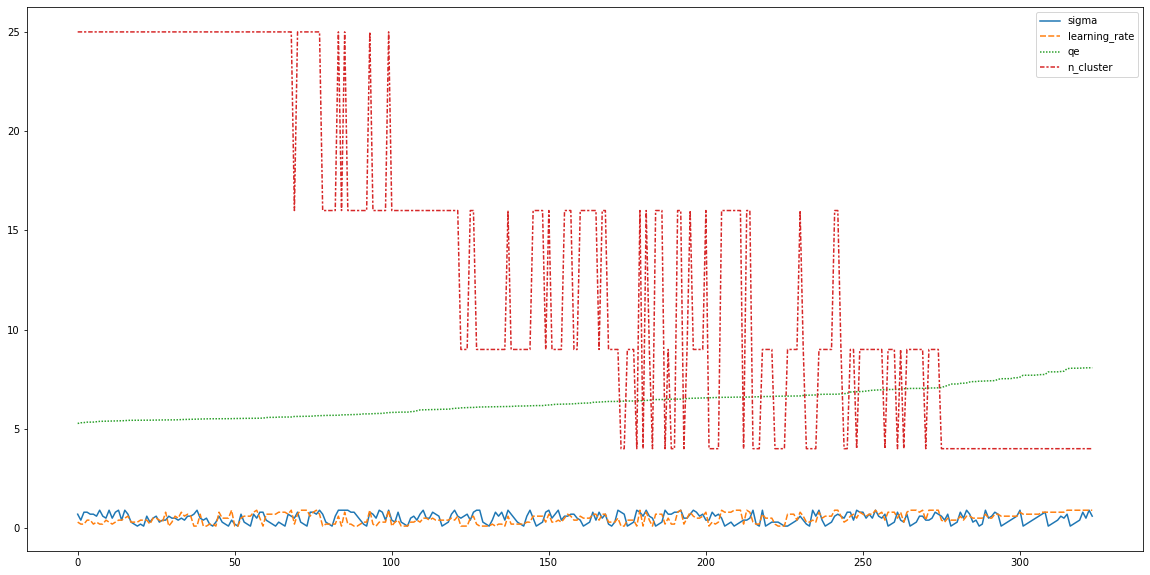

In [34]:
from minisom import MiniSom

s_time = pd.Timestamp.now()
print('시작시간:',s_time,'\n')

# 원하는 파라미터 조합 리스트화
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]

# 결과 값을 담을 리스트 res 생성
res = []
# 모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            
            try:
                # 랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,56,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=42)
                estimator.random_weights_init(scaled_df.values)
                estimator.train(scaled_df.values,1000,random_order=True)
                qe = estimator.quantization_error(scaled_df.values)
                # te = estimator.topographic_error(scaled_df.values)
                winner_coordinates = np.array([estimator.winner(x) for x in scaled_df.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])

                # pca로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,4,sigma =sigma, learning_rate = lr,topology='hexagonal', random_seed=42)
                estimator.pca_weights_init(scaled_df.values)
                estimator.train(scaled_df.values,1000,random_order=True)
                qe = estimator.quantization_error(scaled_df.values)
                # te = estimator.topographic_error(scaled_df.values)
                winner_coordinates = np.array([estimator.winner(x) for x in scaled_df.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'pca_init',qe,len(np.unique(cluster_index))])
                
            except ValueError as e:
                print(e)
            
# 결과 데이터프레임 생성 및 sorting 
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 
df_res.shape
df_res.sort_values(by=['qe'],ascending=True,inplace=True,ignore_index=True)
df_res.head(10)

# 시각화를 위한 lineplot 생성
plt.figure(figsize=(20,10))
sns.lineplot(data = df_res)

e_time = pd.Timestamp.now()
print('\n종료시간:',e_time,'\n총 소요시간:',e_time-s_time)

In [35]:
df_res

,map_size,sigma,learning_rate,init_method,qe,n_cluster
0,5x5,0.7,0.3,random_init,5.270559,25
1,5x5,0.4,0.2,random_init,5.305664,25
2,5x5,0.8,0.2,random_init,5.315885,25
3,5x5,0.8,0.4,random_init,5.337061,25
4,5x5,0.7,0.4,random_init,5.337695,25
...,...,...,...,...,...,...
319,2x2,0.4,0.9,random_init,8.056978,4
320,2x2,0.8,0.9,random_init,8.066916,4
321,2x2,0.5,0.9,random_init,8.073240,4
322,2x2,0.9,0.9,random_init,8.075346,4


In [36]:
# cluster 총 개수별 군집화 종류 개수
df_res['n_cluster'].value_counts()

25    81
16    81
9     81
4     81
Name: n_cluster, dtype: int64

In [37]:
df_res[df_res['n_cluster']==4]

,map_size,sigma,learning_rate,init_method,qe,n_cluster
173,2x2,0.8,0.1,random_init,6.391071,4
174,2x2,0.7,0.1,random_init,6.395825,4
178,2x2,0.9,0.1,random_init,6.413493,4
180,2x2,0.6,0.1,random_init,6.417253,4
183,2x2,0.5,0.1,random_init,6.472109,4
...,...,...,...,...,...,...
319,2x2,0.4,0.9,random_init,8.056978,4
320,2x2,0.8,0.9,random_init,8.066916,4
321,2x2,0.5,0.9,random_init,8.073240,4
322,2x2,0.9,0.9,random_init,8.075346,4


### (4) 모델 파라미터 조정

In [38]:
# qe값이 최소인 하이퍼파라미터 기준 SOM 진행
som_b2 = MiniSom(2,2,56,sigma=0.8,learning_rate=0.1,topology='hexagonal',neighborhood_function='gaussian',activation_distance='euclidean', random_seed=42)

# 초기값설정
som_b2.pca_weights_init(scaled_df.values)
som_b2.train(scaled_df.values,1000,random_order=True)

# 평가
som_b2.quantization_error(scaled_df.values)
#som_b2.topographic_error(data.values)

6.42072234413208

In [39]:
winner_coordinates = np.array([som_b2.winner(x) for x in scaled_df.values]).T
cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))

In [40]:
# 4개의 cluster에 배정된 cluster별 data 개수
pd.DataFrame(cluster_index).value_counts()

5    9645
0    7335
6    5038
1    4439
dtype: int64

### (5) 시각화

In [41]:
from matplotlib.patches import RegularPolygon
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import ColorbarBase

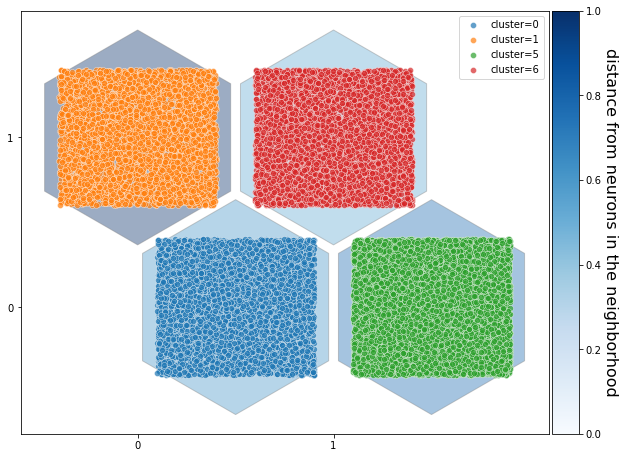

In [42]:
xx, yy = som_b2.get_euclidean_coordinates()
umatrix = som_b2.distance_map()
weights = som_b2.get_weights()

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# iteratively add hexagons
# plotting the distance map as background
# 해당 셀과 다른 이웃들 간 거리를 표현, 밝을수록 가깝고, 어두울수록 멀다
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        plot = ax.add_patch(hex)

#output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in scaled_df.values[cluster_index==c]]
        y_= [som_b2.convert_map_to_euclidean(som_b2.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in scaled_df.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])

#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
df_cnt

#x축,y축 간격 설정 
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

#차트 우측에 color bar생성
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
plot = cb1.ax.set_ylabel('distance from neurons in the neighborhood',
                  rotation=270, fontsize=16)
plot = plt.gcf().add_axes(ax_cb)

#이미지 저장
#plt.savefig('som_seed_hex.png')

In [43]:
#클러스터링 변수인 clusters 값을 원본 데이터인 'scaled_df'내에 넣기 
scaled_df['cluster'] = cluster_index
scaled_df.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,-0.573599,0.149136,-0.731391,0.927612,-0.538417,-0.645705,-0.316937,-0.214735,-1.623064,0.703562,-0.703562,-1.278015,1.278015,-0.695591,0.695591,-0.55335,2.224124,-0.29771,-0.016268,-1.031997,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,2.227436,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,1
1,0.764529,-0.292575,0.044045,0.797238,-0.538417,1.548696,-0.316937,0.876135,0.007446,0.703562,-0.703562,0.782463,-0.782463,1.437626,-1.437626,-0.55335,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,1.641365,-0.200248,-0.099041,-1.458275,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,3.069242,-0.060662,-0.127621,-0.068622,5
2,-0.573599,-0.513431,0.589087,0.161398,1.857295,1.548696,-0.316937,-0.214735,1.034063,-1.421339,1.421339,-1.278015,1.278015,1.437626,-1.437626,-0.55335,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,2.205379,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,0
3,2.102658,-0.734287,0.877793,0.864324,-0.538417,1.548696,-0.316937,1.967005,0.852895,0.703562,-0.703562,-1.278015,1.278015,1.437626,-1.437626,-0.55335,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,7.835725,-0.068622,5
4,0.764529,0.369992,-0.051635,-0.072769,-0.538417,-0.645705,-0.316937,0.876135,1.396399,-1.421339,1.421339,-1.278015,1.278015,-0.695591,0.695591,-0.55335,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,3.974682,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,0


In [44]:
# cluster를 기준으로 데이터 개수 세기
scaled_df.groupby('cluster').count()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335,7335
1,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439,4439
5,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645
6,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038


In [45]:
#그룹별 특징을 알아보기(그룹별 평균값)
scaled_df.groupby('cluster').mean()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.029516,0.420785,0.396421,-0.022516,0.168048,-0.020742,0.053708,0.103082,-0.009366,-1.325161,1.325161,-0.717037,0.717037,0.182125,-0.182125,0.101547,-0.447793,-0.075367,-0.007885,0.290540,-0.001742,0.034178,0.075920,0.007991,-0.065468,-0.036928,0.178959,-0.141931,-0.011771,-0.178565,0.022254,-0.126056,0.011984,0.019898,0.030292,0.140035,-0.168340,-0.117691,-0.080258,-0.158857,0.621895,-0.045407,-0.034368,0.018709,0.040319,0.388975,0.076513,0.282992,-0.172231,-0.448582,-0.087705,-0.029276,-0.192973,-0.015547,0.051514,-0.024708
1,-0.510295,-0.370167,-1.383632,0.927529,-0.538417,-0.015414,-0.204302,-0.498327,0.015064,0.390020,-0.390020,0.357278,-0.357278,-0.218393,0.218393,-0.553350,2.224124,-0.297710,-0.016268,-1.031997,-0.021854,-0.238625,-0.147593,0.144428,0.259257,-0.072309,-0.121511,0.003642,-0.057586,0.473291,-0.050611,0.211842,-0.001621,-0.047699,-0.085576,-0.220164,-0.187873,-0.124370,-0.132578,-0.333354,-0.251592,-0.404662,-0.048466,-0.202281,-0.039397,-0.452838,-0.069451,-0.298687,-0.183737,2.226230,-0.096280,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622
5,0.379947,-0.110744,0.314321,-0.215606,0.129501,0.058460,0.060696,0.537507,-0.008120,0.560800,-0.560800,0.120418,-0.120418,0.029415,-0.029415,0.063642,-0.448506,0.118193,0.009232,0.216730,0.009200,0.137456,-0.025227,-0.051471,-0.110290,-0.068676,0.491228,-0.210869,-0.362954,-0.183678,-0.000163,-0.028560,0.013654,-0.019972,0.005423,0.034973,0.182928,-0.025324,0.085466,0.234096,-0.236256,0.238299,0.007286,0.092228,-0.015674,-0.087350,-0.036449,-0.009826,-0.144653,-0.448947,0.106960,0.034106,0.231053,0.028542,-0.026066,-0.044333
6,-0.320741,-0.074467,0.040209,-0.371702,-0.018189,-0.068139,-0.014383,-0.740033,0.015908,0.512076,-0.512076,0.498626,-0.498626,-0.129048,0.129048,0.217874,-0.449084,0.145767,0.008141,0.071369,0.004178,-0.102660,0.067807,-0.040351,0.078029,0.248952,-1.093921,0.607132,0.762735,0.194603,0.012504,0.051551,-0.042159,0.051292,0.020916,-0.076848,0.060421,0.329416,0.070045,0.076841,-0.231459,-0.033553,0.078793,-0.025575,0.006018,-0.000098,0.019575,-0.130033,0.689580,-0.448947,0.007756,0.020376,0.125693,0.021442,0.087349,0.181309


In [46]:
# PCA 진행
from sklearn.decomposition import PCA
X = scaled_df.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 2.7749825 , -2.89183847],
       [-2.38412435,  0.75567831],
       [ 3.83805292,  2.03475332],
       ...,
       [ 3.53365155,  0.73100168],
       [ 3.19694849,  1.51059195],
       [ 3.33853704,  0.52556473]])

In [47]:
# x_pca를 보기 쉽게 데이터프레임으로 변환
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = scaled_df['cluster'] 
pca_df.head()

,0,1,cluster
0,2.774982,-2.891838,1
1,-2.384124,0.755678,5
2,3.838053,2.034753,0
3,-1.568297,1.948577,5
4,4.234422,1.858124,0


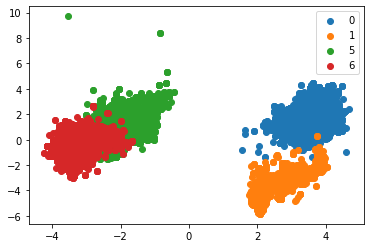

In [48]:
# pca가 완료된 이후의 2개의 cluster 시각화
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()))

In [49]:
scaled_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,-0.573599,0.149136,-0.731391,0.927612,-0.538417,-0.645705,-0.316937,-0.214735,-1.623064,0.703562,-0.703562,-1.278015,1.278015,-0.695591,0.695591,-0.553350,2.224124,-0.29771,-0.016268,-1.031997,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,2.227436,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,1
1,0.764529,-0.292575,0.044045,0.797238,-0.538417,1.548696,-0.316937,0.876135,0.007446,0.703562,-0.703562,0.782463,-0.782463,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,1.641365,-0.200248,-0.099041,-1.458275,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,3.069242,-0.060662,-0.127621,-0.068622,5
2,-0.573599,-0.513431,0.589087,0.161398,1.857295,1.548696,-0.316937,-0.214735,1.034063,-1.421339,1.421339,-1.278015,1.278015,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,2.205379,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,0
3,2.102658,-0.734287,0.877793,0.864324,-0.538417,1.548696,-0.316937,1.967005,0.852895,0.703562,-0.703562,-1.278015,1.278015,1.437626,-1.437626,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,-0.251592,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,7.835725,-0.068622,5
4,0.764529,0.369992,-0.051635,-0.072769,-0.538417,-0.645705,-0.316937,0.876135,1.396399,-1.421339,1.421339,-1.278015,1.278015,-0.695591,0.695591,-0.553350,-0.449615,-0.29771,-0.016268,0.968995,-0.029497,-0.609249,-0.200248,-0.099041,0.685742,-0.295371,0.673796,-0.248521,-0.390203,-0.208576,-0.064615,0.344307,-0.178618,-0.085049,-0.128383,-0.22334,-0.187873,-0.12437,-0.132578,-0.333354,3.974682,-0.405309,-0.048466,-0.202281,-0.039397,-0.453437,-0.069451,-0.298687,-0.183737,-0.448947,-0.09628,-0.048856,-0.325813,-0.060662,-0.127621,-0.068622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### 데이터에 SOM 분석 결과 column을 추가함으로써 군집 분석 결과 반영

In [50]:
# data에 'cluster' column 추가
data['cluster'] = scaled_df['cluster']
data

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,0,202500.0,-19031,0,0,0,0,2,-53,1.0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,157500.0,-15773,-309,0,1,0,3,-26,0.0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5
2,0,135000.0,-13483,-1816,1,1,0,2,-9,1.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,112500.0,-12270,-150,0,1,0,4,-12,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
4,1,225000.0,-16175,-2371,0,0,0,3,-3,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,202500.0,-12347,-2057,0,0,0,2,-30,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
26453,0,148500.0,-9382,-2049,0,1,1,1,-24,NaN,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
26454,0,270000.0,-14896,-5420,0,0,1,2,-26,NaN,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,405000.0,-15881,-4781,1,0,0,2,-30,NaN,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# 다시 원래대로 train(credit 값 존재)과 test(credit 값 NaN) 분리
train_data = data.loc[data['credit'].notnull()]
test_data = data.loc[data['credit'].isnull()]

## 3. train 데이터셋 분리 및 추가 전처리(class imbalance)
+ random_state = 42로 통일

In [52]:
# 0과 1의 label 값의 비율 확인 -> 1:7 의 class imbalance 상태 -> 전처리
train_data['credit'].value_counts()

1.0    11617
0.0     1611
Name: credit, dtype: int64

In [53]:
# train_dum -> train:test = 7:3으로 y값의 비율 맞춰(stratify) 분리
from sklearn.model_selection import train_test_split

y = train_data['credit']
X = train_data.drop(['credit'],axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
# class imbalance 해결을 위해 SMOTETomek을 이용한 복합 oversamping 진행
# over_X : oversampling된 train_X
# over_y : oversampling된 train_y
from imblearn.combine import *

over_X, over_y = SMOTETomek(random_state=42).fit_resample(train_X, train_y)

In [55]:
# StandardScaler을 이용해 데이터셋 정규화
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

sd.fit(over_X)
over_X_sd = sd.transform(over_X)
val_X_sd = sd.transform(val_X)

## 4. Modeling

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Logistic Regression(LR)

In [57]:
# logistic regression 클래스 지정
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

In [58]:
# 하이퍼파라미터 탐색
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [59]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
lr = LogisticRegression(random_state=42)
para3 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

lr = GridSearchCV(estimator = lr, param_grid = para3, cv=5, scoring='accuracy')
lr.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [60]:
# 최적 하이퍼파라미터 확인
lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [61]:
# 검증 데이터 accuracy 확인
lr = LogisticRegression(C=1, penalty='l2', random_state=42)
lr.fit(over_X_sd, over_y)
pred = lr.predict(val_X_sd)
print(accuracy_score(val_y, pred))

0.8785588309397834


In [62]:
pd.DataFrame(pred).value_counts()

1.0    3968
0.0       1
dtype: int64

## 5. 최종 예측

In [63]:
test_y = test_data['credit']
test_X = test_data.drop(['credit'],axis=1)

In [64]:
# index 재지정
test_X = test_X.reset_index(drop=True)
test_X

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Extra,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_None,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,0,211500.0,-10072,-1101,1,1,0,1,-10,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,0,157500.0,-24340,0,0,1,0,1,-52,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,45000.0,-15724,-1389,1,1,0,2,-15,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5
3,2,270000.0,-11505,-4019,0,0,0,3,-24,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,202500.0,-15929,-2879,0,1,0,2,-54,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,0,202500.0,-12347,-2057,0,0,0,2,-30,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
13225,0,148500.0,-9382,-2049,0,1,1,1,-24,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
13226,0,270000.0,-14896,-5420,0,0,1,2,-26,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13227,0,405000.0,-15881,-4781,1,0,0,2,-30,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
test_y = pd.DataFrame(test_y).reset_index(drop=True)
test_y

,credit
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13224,NaN
13225,NaN
13226,NaN
13227,NaN


In [66]:
test_X_sd = sd.transform(test_X)

In [67]:
test_label = pd.read_csv('data/test/test_label.csv')
test_label

,index,credit
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
13224,13224,NaN
13225,13225,NaN
13226,13226,NaN
13227,13227,NaN


In [68]:
# model.predict()
pred_label = lr.predict(test_X_sd)
pred_label = pd.DataFrame(pred_label)
pred_label

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
13224,1.0
13225,1.0
13226,1.0
13227,1.0


In [69]:
# test_label의 credit 값 채우기
test_label['credit'] = pred_label
test_label

,index,credit
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
13224,13224,1.0
13225,13225,1.0
13226,13226,1.0
13227,13227,1.0


In [70]:
# dtype float -> int로 변경
test_label['credit'] = test_label['credit'].apply(np.int64)
test_label

,index,credit
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
13224,13224,1
13225,13225,1
13226,13226,1
13227,13227,1


In [71]:
# test_label.csv로 내보내기
test_label.to_csv('data/test/test_label.csv', index = None)#